## 1. Problem Statement

- To predict the temperature of a region where fire is occuring by using Algerian Forest Fire dataset

## 2. Data Collection

- Dataset Source - https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

### 2.1 Import Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', 500)

#### Import the CSV Data as Pandas DataFrame

In [2]:
dataset = pd.read_csv(r'C:\Users\ss\Downloads\Algerian_forest_fires_dataset_UPDATE.csv',header = 1)

In [3]:
dataset.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [4]:
# dropping row 122 and 123

dataset.drop(index=[122,123], inplace=True)
dataset.reset_index(inplace=True)
dataset.drop('index', axis=1,  inplace=True)
dataset.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


In [5]:
### creating feature called Region 0 for Bejaia region and 1 for Sidi Bel-abbes region
dataset.loc[:122,'Region']=0
dataset.loc[122:, 'Region']=1

dataset.iloc[120:].head(8)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1.0
127,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1.0


In [6]:
# here it is visible that all datatypes are in object 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [7]:
dataset.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244.000000
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8,NaN
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,NaN
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.501028
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


## 1.4 Data Cleaning

In [8]:
# here it is visible that some columns have spaces in the names like RH, Ws
dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [9]:
# stripping spaces from column names
dataset.columns= [col_name.strip() for col_name in dataset.columns]
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
### converting all feature values to string so that we can do data cleaning as shown below.
dataset=dataset.astype(str)

In [11]:
### somes values in colums also have space
for feature in ['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    dataset[feature]= dataset[feature].str.replace(" ","")

In [12]:
### index no 165 for feature name FWI has value fire
dataset[dataset['FWI']== 'fire'].index

Int64Index([165], dtype='int64')

In [13]:
### replacing fire value witha float value
dataset.loc[165,'FWI']=' 0.1'

In [14]:
### replacing nan value with fire to make data equal to the info given in dataset 
dataset[dataset['Classes']== 'nan'].index
dataset.loc[165,'Classes']='fire'

In [15]:
### encoding classes feature
dataset['Classes']=dataset['Classes'].str.replace('notfire','0')
dataset['Classes']=dataset['Classes'].str.replace('fire','1')

In [16]:
### changing datatypes of features to numerical for numerical features as all are in object

datatype_convert={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
                  'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64', 
                 'Classes':'int64', 'Region':'float64'}

dataset=dataset.astype(datatype_convert)
dataset.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

In [17]:
dataset.shape

(244, 15)

###  Checking Null values

In [18]:
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

#### There are no missing values in the data set

### define numerical & categorical columns

In [21]:
numeric_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 15 numerical features : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']

We have 0 categorical features : []


In [23]:
#getting to know different categories in cateogrical features with its count.

for feature in categorical_features:
    print(dataset.groupby(feature)['Region'].value_counts())

<AxesSubplot:xlabel='Classes', ylabel='count'>

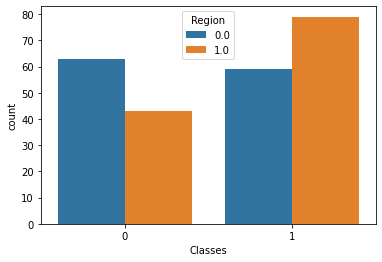

In [24]:
sns.countplot(data=dataset, x='Classes', hue='Region')

### Insight

- Sidi Bel-abbes region has more occurance of fire than Bejaia region.

In [27]:
### Getting uniques values in each numerical features

dataset[numeric_features].nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
dtype: int64

 ### Checking for outliers

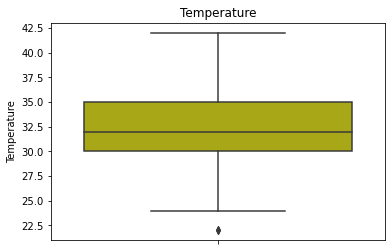

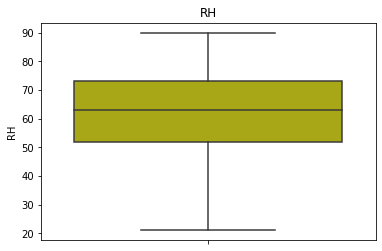

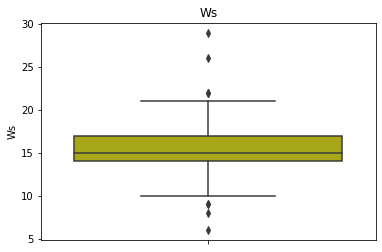

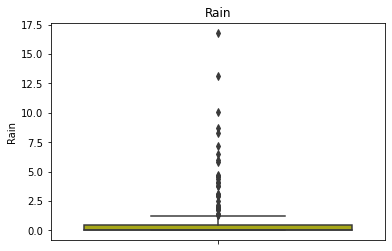

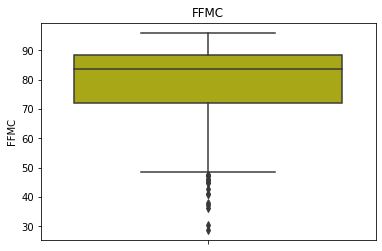

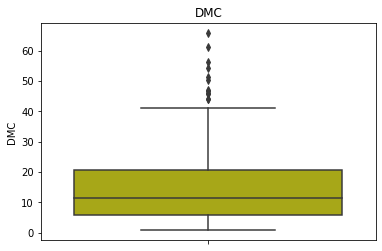

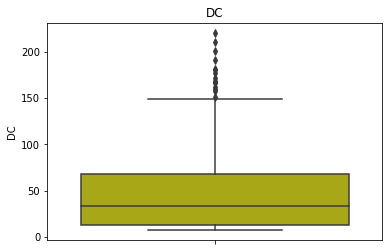

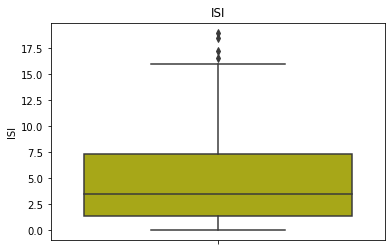

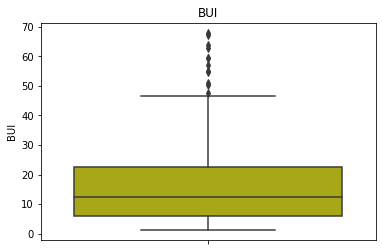

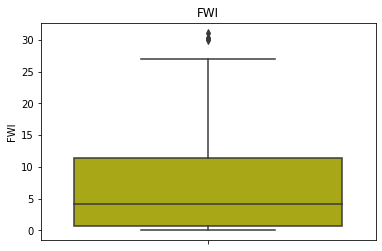

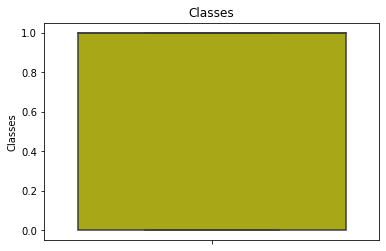

In [30]:
# excluding 'day', 'month','year', 'Region'.

for feature in [feature for feature in numeric_features if feature not in ['day', 'month','year', 'Region']]:
    sns.boxplot(data=dataset, y= feature, color='y')
    plt.title(feature)
    plt.show();

### Insight

- Relative Humidity, RH feature doesnt have outliers.
- Temperature and FFMC have outliers in lower boundary side.
- Wind Speed, Ws has outliers on both sides(Upper and lower boundary).
- Rain, DMC,DC, ISI, BUI and FWI have outilers in upper boundary side.

 ### Correlation between each Numerical features

In [31]:
data= round(dataset[[feature for feature in numeric_features if feature not in ['day', 'month','year', 'Region']]].corr(),2)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.56,0.52
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.57,-0.44
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.02,0.03,0.03,-0.07
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.38
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.69,0.77
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.67,0.98,0.87,0.58
DC,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74,0.51
ISI,0.61,-0.69,0.02,-0.35,0.74,0.67,0.50,1.00,0.64,0.91,0.74
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86,0.58
FWI,0.56,-0.57,0.03,-0.32,0.69,0.87,0.74,0.91,0.86,1.00,0.71


### Heatmap to visualise the Correlation

<AxesSubplot:>

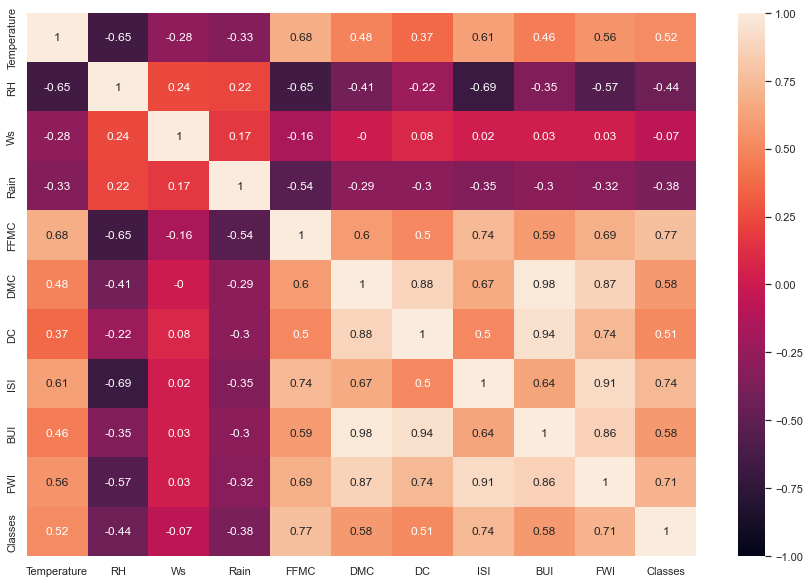

In [33]:
# plotting heatmap to visualize the correlation between features

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data, annot=True,  vmin=-1, vmax=1)


### Insight

- Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI
- Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI

###  Feature vs target

<AxesSubplot:xlabel='day', ylabel='Temperature'>

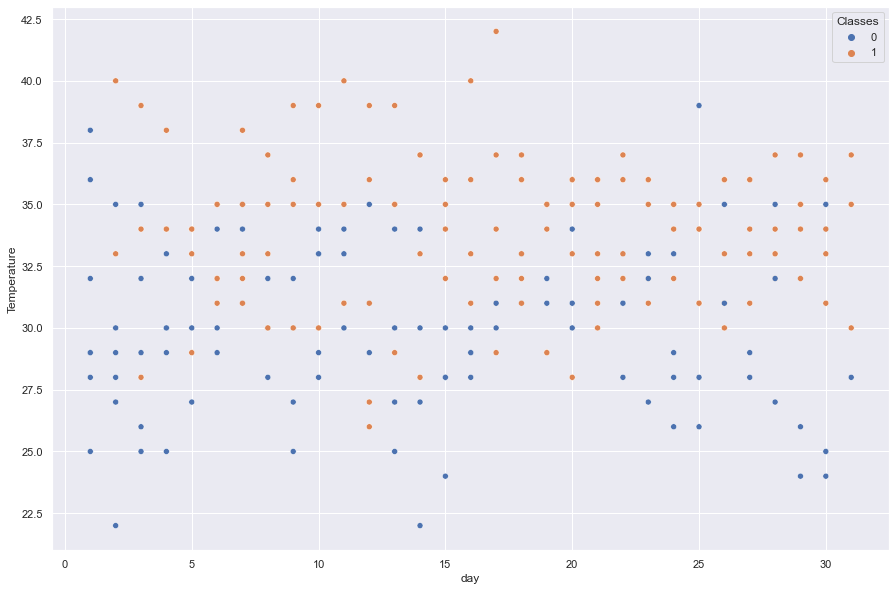

In [35]:
sns.scatterplot(data = dataset, x = 'day', y = 'Temperature', hue='Classes')

### Insight

 - maximum fires occures when temmp is between 27.5 to 37.5 degree celsius.

### Region

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

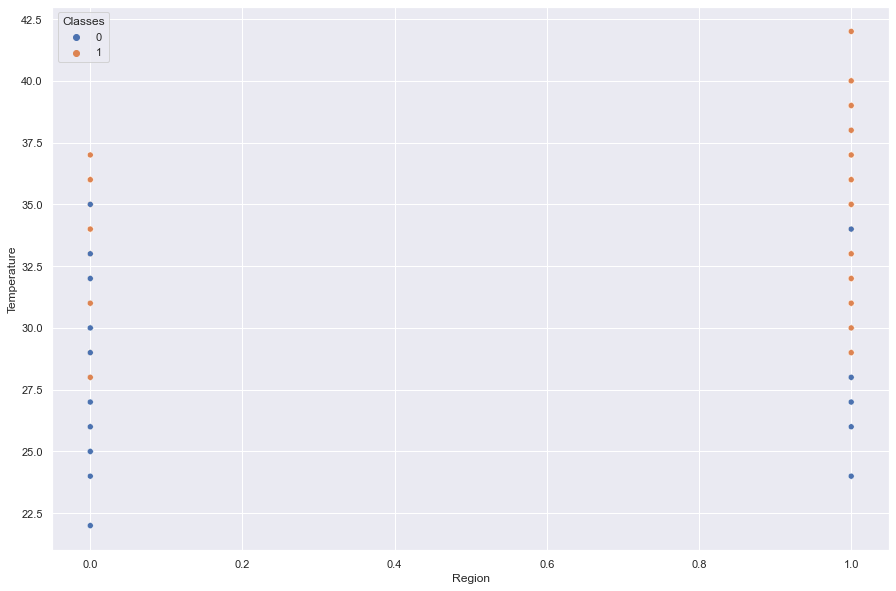

In [36]:
sns.scatterplot(data = dataset, x = 'Region', y = 'Temperature', hue='Classes')

### Insight

- no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region

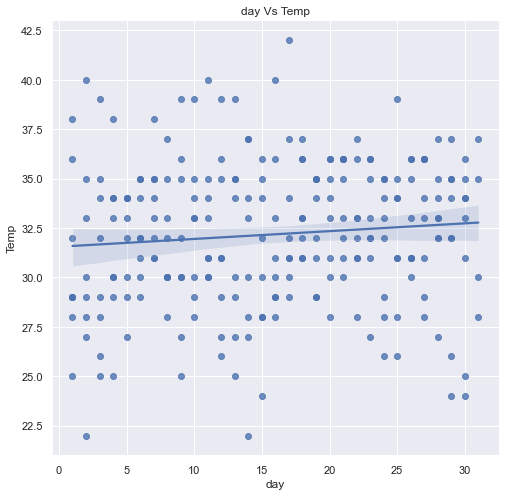

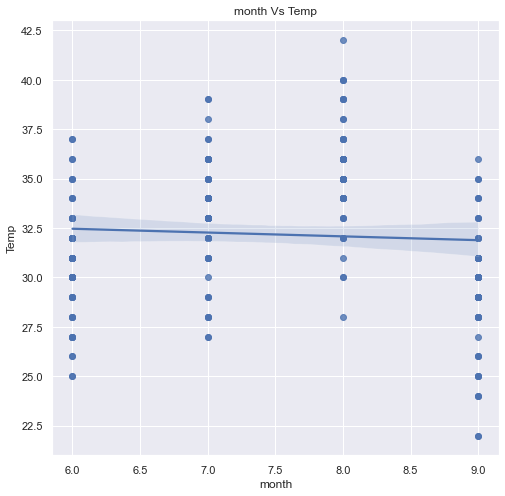

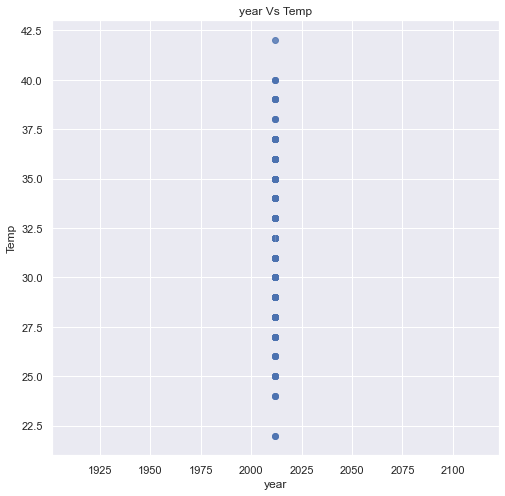

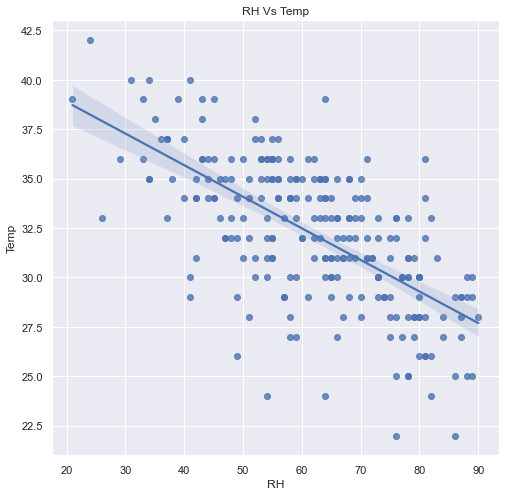

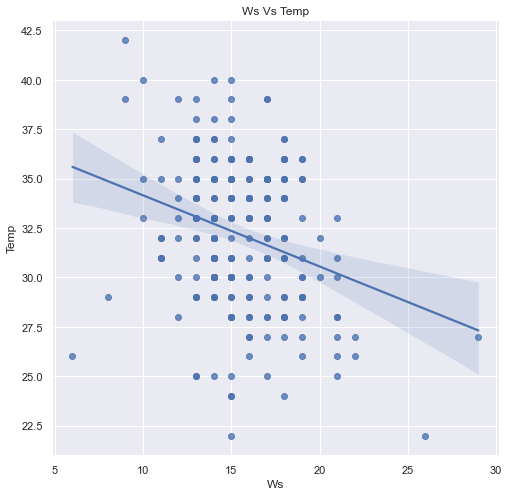

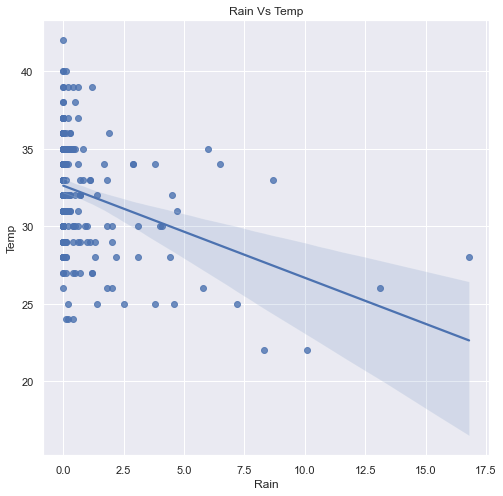

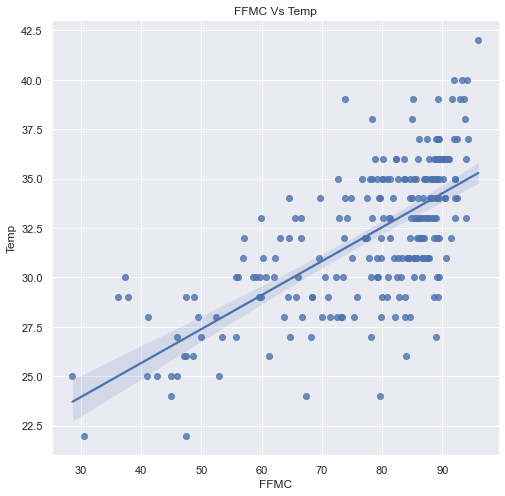

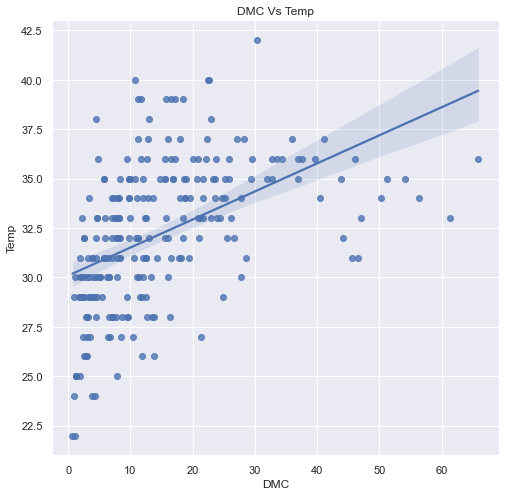

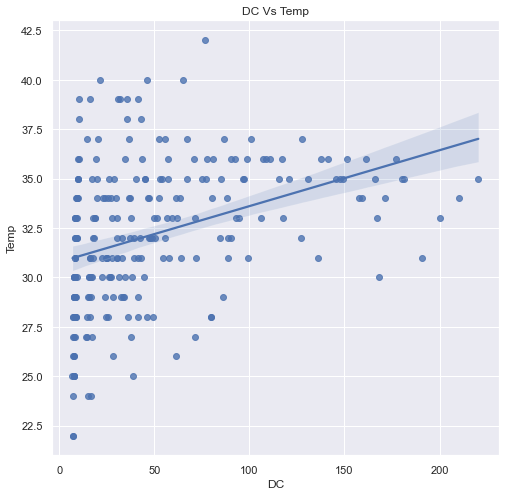

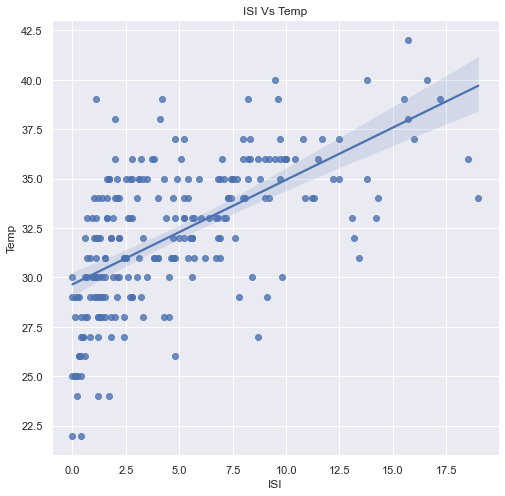

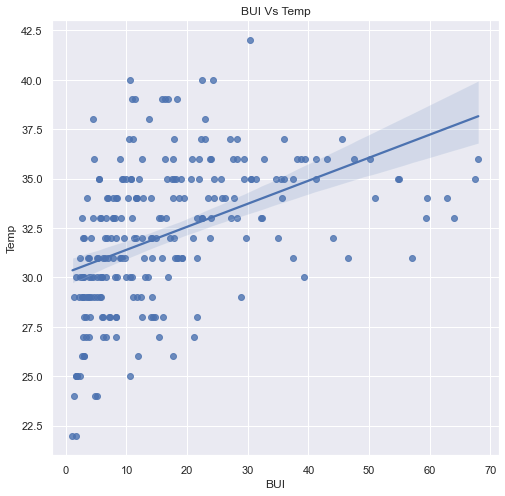

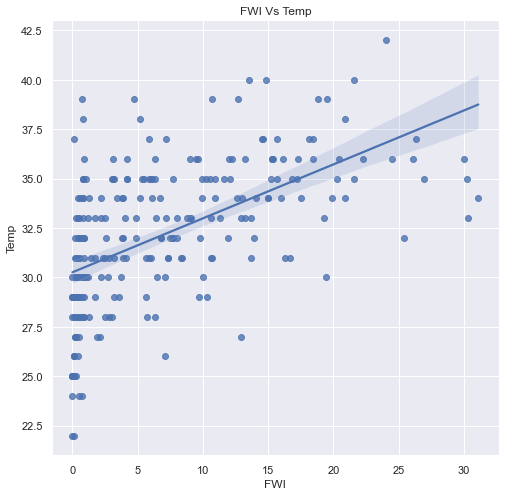

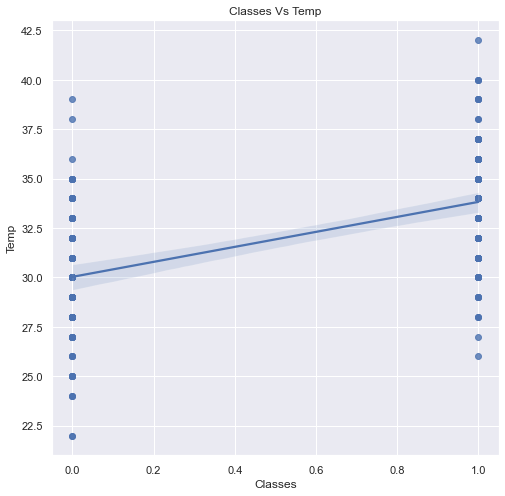

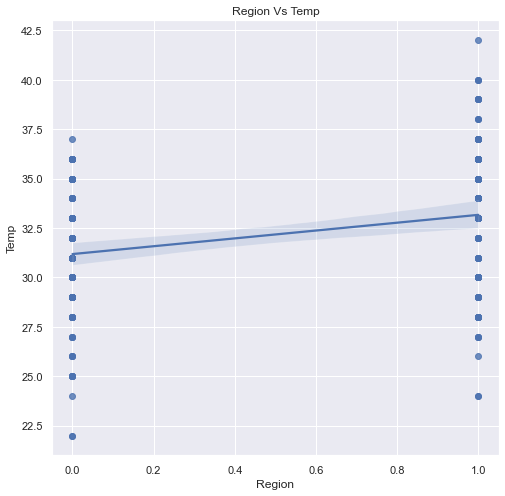

In [39]:
for feature in [feature for feature in dataset.columns if feature not in ['Temperature']]:
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(x=dataset[feature], y=dataset['Temperature'])
    plt.xlabel(feature)
    plt.ylabel("Temp")
    plt.title("{} Vs Temp".format(feature))
    plt.show();
    

### Insight

- Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI
- Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI
- Temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.
- Wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.
- Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.
- For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.
- DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.
- In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.
- In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire.
- Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.

## Model Building

### Getting Independent features in a dataset and Dependent feature in Series object

In [40]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


### dropping year feature as dataset contains only 2012 year

In [41]:
dataset.drop('year', axis=1, inplace=True)

In [42]:
dataset['Temp']=dataset['Temperature']

In [43]:
dataset.drop('Temperature', axis=1, inplace=True)

In [44]:
dataset.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Temp
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,29
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0,29
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0,26
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0,25
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0,27


In [45]:
# x is independent feature and y is dependent feature

x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]


In [46]:
x.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [47]:
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temp, dtype: int64

### Splitting data into Training and Test data

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
#random state train test split will be same with all people using random_state=42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [51]:
x_train.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
114,23,9,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0,0.0
65,5,8,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1,1,0.0
132,11,6,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,1,1.0
207,25,8,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,1,1.0
162,11,7,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1.0


In [52]:
y_train.head()

114    32
65     34
132    31
207    34
162    34
Name: Temp, dtype: int64

In [53]:
x_test.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
24,25,6,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,1,0.0
6,7,6,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0.0
153,2,7,48,16,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1,1.0
211,29,8,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1,1.0
198,16,8,41,10,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1,1.0


In [54]:
y_test.head()

24     31
6      33
153    33
211    35
198    40
Name: Temp, dtype: int64

In [55]:
# both will have same shape

x_train.shape, y_train.shape

((163, 13), (163,))

In [56]:
x_test.shape, y_test.shape

((81, 13), (81,))

### Standardisation

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
# creating a StandardScalar object

scaler = StandardScaler()
scaler

StandardScaler()

In [59]:
# Using fit_transform to standardise Train data

x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.84447703,  1.3826723 , -0.60257784, ..., -0.8196431 ,
        -1.04390785, -0.99388373],
       [-1.19310159,  0.48116996,  0.14460201, ..., -0.08219052,
         0.95793896, -0.99388373],
       [-0.51390872, -1.32183472, -1.41768313, ...,  1.36540157,
         0.95793896,  1.0061539 ],
       ...,
       [-1.64589683,  1.3826723 ,  0.89178186, ..., -0.90158227,
        -1.04390785, -0.99388373],
       [ 1.41047108, -0.42033238, -0.39880152, ...,  0.31384882,
         0.95793896,  1.0061539 ],
       [-0.51390872,  1.3826723 ,  0.9597073 , ..., -0.87426921,
        -1.04390785, -0.99388373]])

In [60]:
# using only transform to avoid data leakage

x_test = scaler.transform(x_test)
x_test

array([[ 1.07087465, -1.32183472,  0.07667657, ...,  0.23190965,
         0.95793896, -0.99388373],
       [-0.96670396, -1.32183472, -0.60257784, ...,  0.0680313 ,
         0.95793896, -0.99388373],
       [-1.53269802, -0.42033238, -1.01013048, ..., -0.04122093,
         0.95793896,  1.0061539 ],
       ...,
       [ 1.29727227, -0.42033238, -1.01013048, ...,  1.17421016,
         0.95793896, -0.99388373],
       [-1.3063004 , -1.32183472,  0.07667657, ..., -0.77867351,
        -1.04390785,  1.0061539 ],
       [ 1.29727227, -1.32183472, -0.5346524 , ...,  0.7235447 ,
         0.95793896,  1.0061539 ]])

 ## Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
# creating linear regression model

linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [63]:
# Passing training data(X and y) to the model

linear_reg.fit(x_train, y_train)

LinearRegression()

In [64]:
# Printing co-efficients and intercept of best fit hyperplane

print("1. Coefficients of independent features is {}" .format(linear_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(linear_reg.intercept_))


1. Coefficients of independent features is [-0.62994684 -0.33080692 -0.9681523  -0.55769053  0.23645285  1.90585623
  0.93380592  1.17296981  0.044581   -1.35995788  0.19772494 -0.25230922
  0.08345626]
2. Intercept of best fit hyper plane is 31.98159509202454


### Using model to get predictions of test data

In [65]:
linear_reg_pred = linear_reg.predict(x_test)
linear_reg_pred

array([32.86982262, 34.97907511, 34.71895423, 32.93220734, 36.64866482,
       32.00281859, 35.27819508, 28.49312857, 31.84450923, 29.27704091,
       29.06704133, 33.07364481, 32.4667427 , 32.7008168 , 34.32599535,
       31.80453584, 37.01042617, 25.23211237, 32.73196597, 33.38253854,
       31.55571716, 28.30699286, 34.23615097, 29.30603632, 36.93126913,
       24.98756128, 33.51228222, 33.57587507, 33.35705604, 35.40329932,
       33.767112  , 31.85221582, 32.40507656, 33.11736397, 32.44972087,
       31.46599605, 30.34784931, 34.2239929 , 32.37589956, 21.74277219,
       33.82900884, 34.85103093, 31.20651563, 24.69868309, 36.17424894,
       32.81796744, 31.22635993, 30.67357508, 35.1950892 , 34.29311524,
       36.98975313, 30.97884914, 30.95678802, 34.6655222 , 33.46814569,
       32.38222097, 36.65227179, 30.589826  , 30.97603618, 36.10290928,
       33.94615809, 28.43783118, 33.17776773, 31.78923636, 31.99593987,
       24.12810241, 33.39123143, 29.76320324, 36.80847578, 34.30

### Validating model using assumptions of Linear regression

### Linear relationship
- Test truth data and Predicted data should follow linear relationship.
- This is an indication of a good model.

Text(0, 0.5, 'Predicted data')

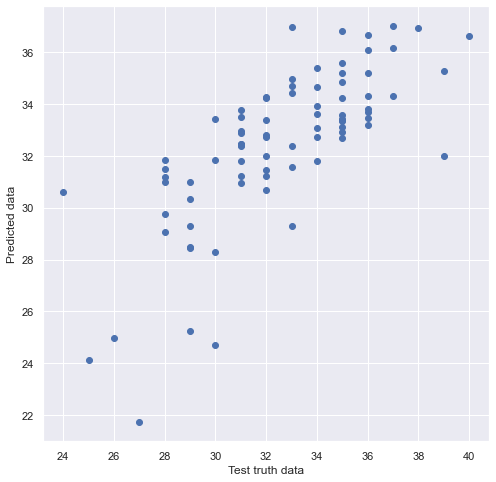

In [66]:
plt.scatter(x=y_test, y= linear_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

### Residual distribution

- Residuals should follow normal distribution.

In [67]:
residual_linear_reg = y_test - linear_reg_pred
residual_linear_reg.head()

24    -1.869823
6     -1.979075
153   -1.718954
211    2.067793
198    3.351335
Name: Temp, dtype: float64

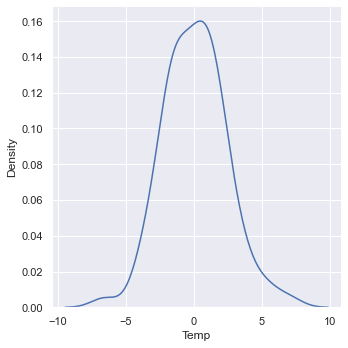

In [68]:
sns.displot(x=residual_linear_reg, kind='kde')

### Uniform distribution

- Residuals vs Predictions should follow a uniform distribution.

Text(0, 0.5, 'Residuals')

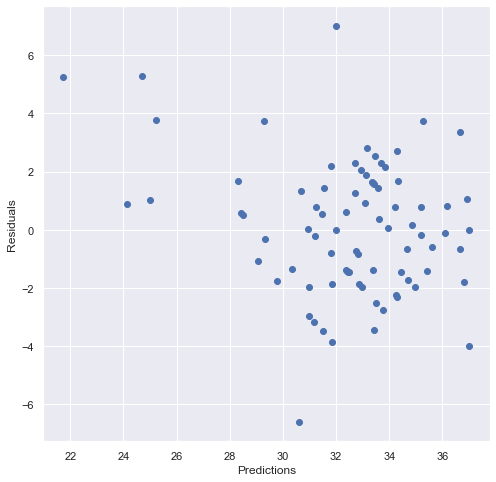

In [70]:
plt.scatter(x=linear_reg_pred, y=residual_linear_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

### Performance Matrix

### Cost function values

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### MSE, MAE and RMSE

In [72]:
print("Mean squared Error is {}".format(round(mean_squared_error(y_test,linear_reg_pred), 2)))
print("Mean absolute Error is {}".format(round(mean_absolute_error(y_test,linear_reg_pred), 2)))
print("Root mean squared Error is {}".format(round(np.sqrt(mean_squared_error(y_test,linear_reg_pred)), 2)))

Mean squared Error is 5.25
Mean absolute Error is 1.81
Root mean squared Error is 2.29


### R Square and Adjusted R Square values

In [73]:
from sklearn.metrics import r2_score

In [75]:
linear_reg_r2_score = r2_score(y_test, linear_reg_pred)
print("Linear Regression model has {} % accuracy".format(round(linear_reg_r2_score*100, 3)))

linear_reg_adj_r2_score=1-((1-linear_reg_r2_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(linear_reg_adj_r2_score*100,2)))

Linear Regression model has 51.089 % accuracy
Adjusted R square accuracy is 41.6 percent


### Ridge Regression

In [76]:
from sklearn.linear_model import Ridge

In [77]:
# Creating Ridge regression model

ridge_reg = Ridge()
ridge_reg

Ridge()

In [78]:
# Passing training data(X and y) to the model

ridge_reg.fit(x_train,y_train)

Ridge()

In [79]:
# Printing co-efficients and intercept of best fit hyperplane

print("coefficient of independent feature is {}".format(ridge_reg.coef_))
print("Intercept of best fit hyperplane is {}".format(ridge_reg.intercept_))

coefficient of independent feature is [-0.61752995 -0.3207458  -0.98218457 -0.55467826  0.21315492  1.84131702
  0.40094067  0.87094221  0.11396182 -0.48465778  0.08466793 -0.24063909
  0.09187935]
Intercept of best fit hyperplane is 31.98159509202454


### Using model to get predictions of test data

In [80]:
ridge_reg_pred = ridge_reg.predict(x_test)
ridge_reg_pred

array([32.85982748, 34.9149207 , 34.6801255 , 32.92998132, 36.61056862,
       32.05917754, 35.25499575, 28.51988807, 31.83679288, 29.28276684,
       29.06439442, 33.15037313, 32.44677748, 32.7322483 , 34.35814975,
       31.78754571, 36.91567124, 25.31324295, 32.67492302, 33.35526777,
       31.49765658, 28.29644553, 34.22316335, 29.30830796, 36.93224783,
       25.06526261, 33.48461631, 33.57641555, 33.35387649, 35.32860357,
       33.76792408, 31.83362797, 32.37993338, 33.16010038, 32.42109455,
       31.5078178 , 30.28919718, 34.25440049, 32.3007279 , 21.86171205,
       33.83192673, 34.81983629, 31.24261825, 24.76831106, 36.10419592,
       32.77320818, 31.21807666, 30.69260083, 35.1742616 , 34.29037291,
       36.93483074, 30.9447582 , 30.97755205, 34.71719979, 33.43904851,
       32.52070875, 36.64973602, 30.62216011, 30.9696123 , 36.10416977,
       33.88939183, 28.47020463, 33.13493675, 31.7769902 , 32.00695307,
       24.17731957, 33.37004249, 29.76297127, 36.78001537, 34.44

 ### Validating model using assumptions of Ridge regression

### Linear relationship

- Test truth data and Predicted data should follow linear relationship.

Text(0, 0.5, 'Predicted data')

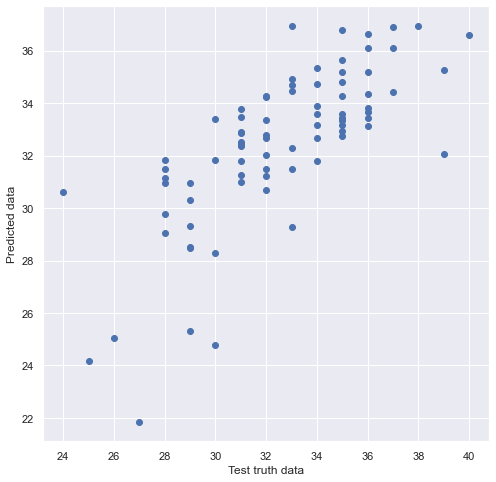

In [81]:
plt.scatter(x=y_test,y=ridge_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

### Residual distribution

- Residuals should follow normal distribution.

In [82]:
residual_ridge_reg = y_test - ridge_reg_pred
residual_ridge_reg.head()

24    -1.859827
6     -1.914921
153   -1.680125
211    2.070019
198    3.389431
Name: Temp, dtype: float64

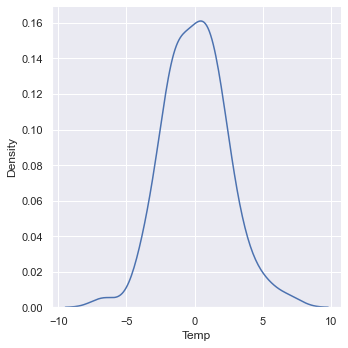

In [83]:
sns.displot(x=residual_ridge_reg, kind='kde')

### Uniform distribution

- Residuals vs Predictions should follow a uniform distribution.

Text(0, 0.5, 'Residuals')

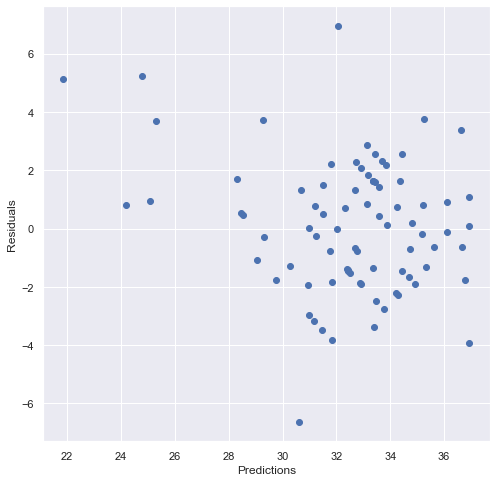

In [84]:
plt.scatter(x=ridge_reg_pred, y=residual_ridge_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

### Performance Matrix

### Cost function values

#### MSE, MAE and RMSE

In [85]:
print("Mean squared error is {}".format(round(mean_squared_error(y_test, ridge_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(y_test, ridge_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)))

Mean squared error is 5.19
Mean absolute error is 1.8
Root Mean squared error is 2.28


In [86]:
ridge_reg_r2_score=r2_score(y_test, ridge_reg_pred)
print("Our Ridge regression model has {} % accuracy".format(round(ridge_reg_r2_score*100,3)))

ridge_reg_adj_r2_score=1-((1-ridge_reg_r2_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(ridge_reg_adj_r2_score*100,2)))

Our Ridge regression model has 51.709 % accuracy
Adjusted R square accuracy is 42.34 percent


### Lasso Regression

In [87]:
from sklearn.linear_model import Lasso

In [88]:
# creating Lasso regression model

lasso_reg = Lasso()
lasso_reg

Lasso()

In [89]:
# Passing training data(X and y) to the model
lasso_reg.fit(x_train, y_train)

Lasso()

In [90]:
# Printing co-efficients and intercept of best fit hyperplane

print("1. Co-efficients of independent features is {}".format(lasso_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(lasso_reg.intercept_))

1. Co-efficients of independent features is [-0.         -0.         -0.62324302 -0.         -0.          1.25581509
  0.          0.          0.          0.          0.          0.
  0.        ]
2. Intercept of best fit hyper plane is 31.98159509202454


### Using model to get predictions of test data

In [94]:
lasso_reg_pred = lasso_reg.predict(x_test)
lasso_reg_pred

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

### Validating model using assumptions of Lasso regression

### Linear relationship

- Test truth data and Predicted data should follow linear relationship

Text(0, 0.5, 'Predicted data')

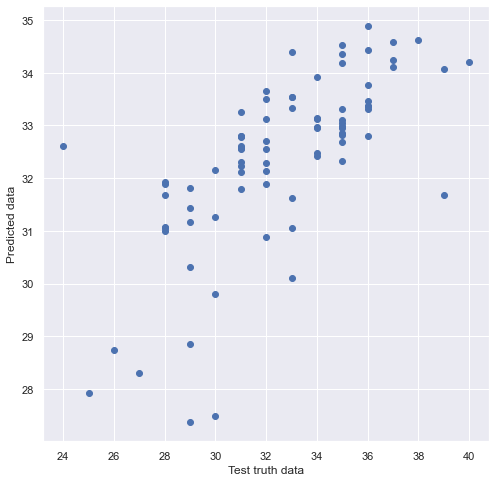

In [95]:
plt.scatter(x=y_test,y=lasso_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")


### Residual distribution

- Residuals should follow normal distribution.

In [97]:
residual_lasso_reg=y_test-lasso_reg_pred
residual_lasso_reg.head()

24    -1.783811
6     -0.335821
153   -0.538357
211    2.308080
198    5.787876
Name: Temp, dtype: float64

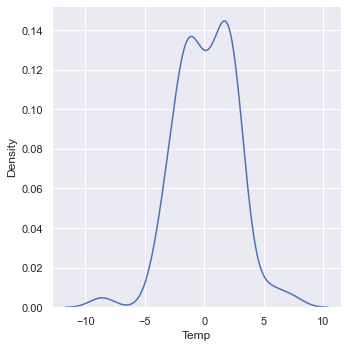

In [98]:
sns.displot(x=residual_lasso_reg, kind='kde')

### Uniform distribution

- Residuals vs Predictions should follow a uniform distribution.

Text(0, 0.5, 'Residuals')

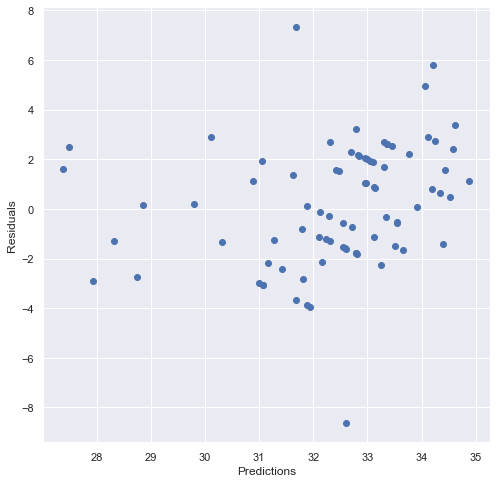

In [99]:
plt.scatter(x=lasso_reg_pred, y=residual_lasso_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

### Performance Matrix

### Cost function values

### MSE, MAE and RMSE

In [100]:
print("Mean squared error is {}".format(round(mean_squared_error(y_test, lasso_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(y_test, lasso_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)))

Mean squared error is 6.09
Mean absolute error is 2.0
Root Mean squared error is 2.47


### R Square and Adjusted R Square values

In [103]:
lasso_reg_r2_score=r2_score(y_test, lasso_reg_pred)
print("Lasso regression model has {} % accuracy".format(round(lasso_reg_r2_score*100,3)))

lasso_reg_adj_r2_score=1-((1-lasso_reg_r2_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(lasso_reg_adj_r2_score*100,2)))

Lasso regression model has 43.342 % accuracy
Adjusted R square accuracy is 32.35 percent


### Elastic-Net Regression

In [104]:
from sklearn.linear_model import ElasticNet

In [105]:
# creating Elastic-Net regression model
elastic_reg=ElasticNet()
elastic_reg

ElasticNet()

In [107]:
# Passing training data(X and y) to the model
elastic_reg.fit(x_train, y_train)

ElasticNet()

In [108]:
# Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(elastic_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(elastic_reg.intercept_))

1. Co-efficients of independent features is [-0.         -0.         -0.68808933 -0.10544712 -0.00834786  0.85162206
  0.10376148  0.          0.23158765  0.02547021  0.15362153  0.07372069
  0.        ]
2. Intercept of best fit hyper plane is 31.98159509202454


### Using model to get predictions of test data

In [110]:
elastic_reg_pred=elastic_reg.predict(x_test)
elastic_reg_pred

array([32.70014869, 33.29910099, 33.41026626, 32.61092932, 34.7047485 ,
       31.58360838, 34.21527053, 29.02563256, 30.73347022, 30.11039166,
       30.41277398, 32.24275851, 32.49689882, 32.11572726, 33.82943086,
       32.26602144, 35.60101706, 27.89264401, 32.12951491, 32.95265792,
       31.02735367, 29.65251053, 33.71392821, 30.09882338, 35.36763797,
       28.87850096, 32.39310489, 32.86323328, 32.70140428, 34.17896096,
       33.34379291, 31.19918174, 32.72501691, 33.05000354, 32.11073799,
       32.39596102, 30.82655691, 33.29618332, 31.03905163, 27.97071052,
       32.81078878, 32.83085009, 32.18944481, 27.83881794, 34.71347157,
       32.40467835, 31.69547324, 30.73847724, 34.32027173, 33.61283179,
       35.5799204 , 31.38989764, 31.57088417, 33.58592157, 33.61999323,
       32.2560815 , 36.04767586, 32.00594323, 30.83622131, 34.89715148,
       33.0854042 , 30.78738109, 33.49083492, 31.9555529 , 31.71431021,
       27.98432489, 32.99835463, 31.35802614, 35.34742765, 34.15

### Validating model using assumptions of Elastic-Net regression

### Linear relationship

- Test truth data and Predicted data should follow linear relationship.

Text(0, 0.5, 'Predicted data')

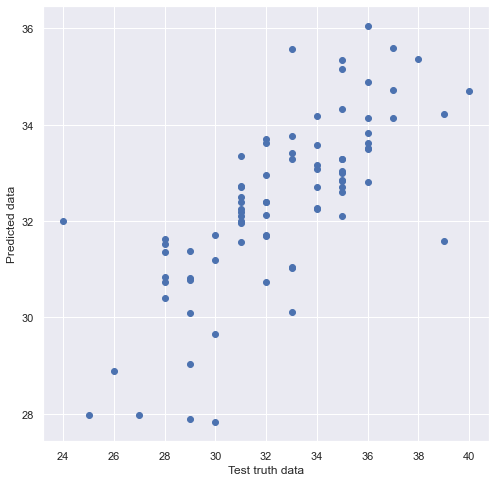

In [111]:
plt.scatter(x=y_test,y=elastic_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

### Residual distribution

- Residuals should follow normal distribution.

In [112]:
residual_elastic_reg=y_test-elastic_reg_pred
residual_elastic_reg.head()

24    -1.700149
6     -0.299101
153   -0.410266
211    2.389071
198    5.295251
Name: Temp, dtype: float64

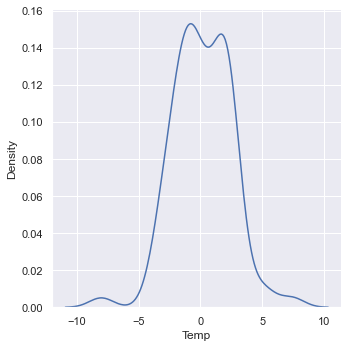

In [113]:
sns.displot(x=residual_elastic_reg, kind='kde')

### Uniform distribution

- Residuals vs Predictions should follow a uniform distribution.

Text(0, 0.5, 'Residuals')

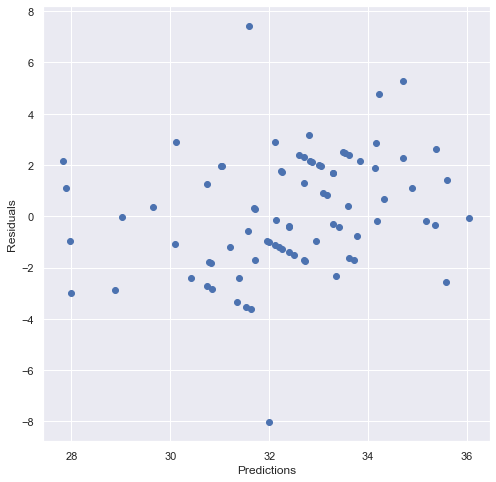

In [114]:
plt.scatter(x=elastic_reg_pred, y=residual_elastic_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

### Performance Matrix

### Cost function values

### MSE, MAE and RMSE

In [115]:
print("Mean squared error is '{}'".format(round(mean_squared_error(y_test, elastic_reg_pred),2)))
print("Mean absolute error is '{}'".format(round(mean_absolute_error(y_test, elastic_reg_pred),2)))
print("Root Mean squared error is '{}'".format(round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)))

Mean squared error is '5.39'
Mean absolute error is '1.85'
Root Mean squared error is '2.32'


### R Square and Adjusted R Square values

In [117]:
elastic_reg_r2_score=r2_score(y_test, elastic_reg_pred)
print("Our Elastic-Net regression model has {} % accuracy".format(round(elastic_reg_r2_score*100,3)))

elastic_reg_adj_r2_score=1-((1-elastic_reg_r2_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(elastic_reg_adj_r2_score*100,2)))

Our Elastic-Net regression model has 49.812 % accuracy
Adjusted R square accuracy is 40.07 percent
